In [1]:
#import needed modules
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Livin' in csv city
mjgross = pd.read_csv('D:/Flatiron/Project/Zips/bom.movie_gross.csv/bom.movie_gross.csv')
imdbname = pd.read_csv('D:/Flatiron/Project/Zips/imdb.name.basics.csv/name.basics.csv')
imdbtitle = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.akas.csv/title.akas.csv')
imdbtitle2 = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.basics.csv/title.basics.csv')
imdbcrew = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.crew.csv/title.crew.csv')
imdbprinc = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.principals.csv/title.principals.csv')
imdbrate = pd.read_csv('D:/Flatiron/Project/Zips/imdb.title.ratings.csv/title.ratings.csv')
rtinfo = pd.read_csv('D:/Flatiron/Project/Zips/rt.movie_info.tsv/rt.movie_info.tsv', delimiter='\t')
rtreviews = pd.read_csv('D:/Flatiron/Project/Zips/rt.reviews.tsv/rt.reviews.tsv', sep=None)
tmdbmovies = pd.read_csv('D:/Flatiron/Project/Zips/tmdb.movies.csv/tmdb.movies.csv')
tnbudgets = pd.read_csv('D:/Flatiron/Project/Zips/tn.movie_budgets.csv/tn.movie_budgets.csv')

In [3]:
# joined imdbcrew and imdbtitle2
imdbcrewtitle2 = imdbtitle2.join(imdbcrew.set_index('tconst'), on='tconst')


In [4]:
#Editing, dropping mostly empty or useless columns
imdbname.drop(['birth_year','death_year'], axis=1, inplace=True)
imdbtitle.drop(['attributes','language'], axis=1, inplace=True)
imdbprinc.drop(['job','characters'], axis=1, inplace=True)
rtinfo.drop(['synopsis','theater_date','dvd_date','studio','currency'], axis=1, inplace=True)

In [5]:
#Make new dict of genres, cutting out fluff
genre_dict = [{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]
k = []
v = []
for i in range(len(genre_dict)):
    k.append(genre_dict[i]['id'])
    v.append(genre_dict[i]['name'])
gendic = dict(zip(k,v))
print(gendic)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [6]:
#Make lists out of Series
titles = tmdbmovies['title'].to_list()
gennums = tmdbmovies['genre_ids'].to_list()

In [7]:
#Create empty DataFrame
genresnp = np.zeros(shape=(26517, 19))
genre = pd.DataFrame(genresnp, columns = v)
genre = genre.applymap(lambda x: int(x))
genre['titles'] = titles
genre = genre.set_index('titles')

In [8]:
#Make list of lists of ints out of list of strings of lists of ints. It was as hard as it is confusing.
gennums = [i.strip("[]").split(", ") for i in gennums] 
gennums = [[int(j) for j in i if j] for i in gennums]

In [9]:
#Use list of int genres as keys to produce names of genres in genre dictionary.
gennums = [[gendic[j] for j in i if j] for i in gennums]
gennums
n= -1
for i in gennums:
    n += 1
    for j in i:
        if j:
            genre.iloc[n].loc[j] += 1
genre
genres = genre.columns

In [10]:
#Just to have a handy reference point
print('\n mjgross \n'); print(len(mjgross)); print(mjgross.isna().sum())
print('\n imdbname \n'); print(len(imdbname)); print(imdbname.isna().sum())
print('\n imdbtitle \n'); print(len(imdbtitle)); print(imdbtitle.isna().sum())
print('\n imdbcrewtitle2 \n'); print(len(imdbcrewtitle2)); print(imdbcrewtitle2.isna().sum())
print('\n imdbprinc \n'); print(len(imdbprinc)); print(imdbprinc.isna().sum())
print('\n imdbrate \n'); print(len(imdbrate)); print(imdbrate.isna().sum())
print('\n rtinfo \n'); print(len(rtinfo)); print(rtinfo.isna().sum())
print('\n rtreviews \n'); print(len(rtreviews)); print(rtreviews.isna().sum())
print('\n tmdbmovies \n'); print(len(tmdbmovies)); print(tmdbmovies.isna().sum())
print('\n tnbudgets \n'); print(len(tnbudgets)); print(tnbudgets.isna().sum())


 mjgross 

3387
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

 imdbname 

606648
nconst                    0
primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

 imdbtitle 

331703
title_id                  0
ordering                  0
title                     0
region                53293
types                163256
is_original_title        25
dtype: int64

 imdbcrewtitle2 

146144
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
directors           5727
writers            35883
dtype: int64

 imdbprinc 

1028186
tconst      0
ordering    0
nconst      0
category    0
dtype: int64

 imdbrate 

73856
tconst           0
averagerating    0
numvotes         0
dtype: int64

 rtinfo 

1560
id               0
rating           3
genre            8
director       1

In [12]:
#list of movies that made over $400 million
top21 = ['Toy Story',
 'The Avengers',
 'The Dark Knight Rises',
 'The Hunger Games',
 'Frozen',
 'Iron Man 3',
 'The Hunger Games: Catching Fire',
 'Star Wars: The Force Awakens',
 'Jurassic World',
 'Avengers: Age of Ultron',
 'Captain America: Civil War',
 'Rogue One: A Star Wars Story',
 'Finding Dory',
 'Star Wars: The Last Jedi',
 'Beauty and the Beast',
 'Jumanji: Welcome to the Jungle',
 'Wonder Woman',
 'Avengers: Infinity War',
 'Black Panther',
 'Jurassic World: Fallen Kingdom',
 'Incredibles 2']

In [13]:
#list of amounts the movies made
moneybank = [415000000.0,
 623400000,
 448100000,
 408000000,
 400700000,
 409000000,
 424700000,
 936700000,
 652300000,
 459000000,
 408100000,
 532200000,
 486300000,
 620200000,
 504000000,
 404500000,
 412600000,
 678800000,
 700100000,
 417700000,
 608600000]

In [14]:
# New df of genres of top 21 movies
genre21 = genre[~genre.index.duplicated()]
genre21 = genre21.reindex(top21)

In [15]:
# Add columns for domestic gross and budget
genre21 = genre[~genre.index.duplicated()]
genre21 = genre21.reindex(top21)
genre21['domgross'] = moneybank
tnbudgets = tnbudgets.set_index('movie')
tnbudgets21 = tnbudgets[~tnbudgets.index.duplicated()]
tnbudgets21 = tnbudgets21.reindex(top21)
tnbudgets21.shape
budgets21 = list(tnbudgets21['production_budget'])
genre21['budget'] = budgets21

In [16]:
# Clean budget column.
genre21['budget'] = genre21['budget'].str.replace(',','')
genre21['budget'] = genre21['budget'].fillna(10)
genre21['budget'] = genre21['budget'].apply(lambda x: int(str(x)[1:]))

In [17]:
# Found missing values using original source's website
# genre21.loc['Toy Story', 'budget'] = 30000000
genre21.loc['Star Wars: The Force Awakens', 'budget'] = 306000000
genre21.loc['Star Wars: The Last Jedi', 'budget'] = 200000000

In [18]:
# Use new columns to create informative columns
genre21['return'] = genre21['domgross'] / genre21['budget'] 
genre21['profit'] = genre21['domgross'] - genre21['budget']

In [19]:
# #Researched Rotten Tomatoes website, reformat list to conform to url structure
# top = []
# for movie in top21:
#     movie = movie.replace(' ', '_').replace(':', '').replace("'",'')
#     top.append(movie)
# # Manually fix two entries that are named differently. Not sure how to automate.
# top[14] = 'beauty_and_the_beast_2017'
# top[7] = 'star_wars_episode_vii_the_force_awakens'
# top[1] = 'marvels_the_avengers'
# # Web Scrape RT to find critic and audience ratings for top 21 movies
# critic_ratings = []
# audience_ratings = []
# for i in range(21):
#     url = 'http://www.rottentomatoes.com/m/{}'.format(top[i])
#     html_page = requests.get(url)
#     soup = BeautifulSoup(html_page.content, 'html.parser')
#     try:
#         critic_ratings.append(soup.find('span', class_="mop-ratings-wrap__percentage").text.strip())
#     except:
#         critic_ratings.append(top[i])
#     try:
#         audience_ratings.append(soup.find('span', class_="mop-ratings-wrap__percentage").text.strip())
#     except:
#         audience_ratings.append(top[i])

In [20]:
# Add two new columns for ratings, clean and convert
# genre21['critics'] = critic_ratings
# genre21['audiences'] = audience_ratings
# genre21['audiences'] = genre21['audiences'].apply(lambda x: int(x[0:-1]))
# genre21['critics'] = genre21['critics'].apply(lambda x: int(x[0:-1]))
# for c in genre21.columns:
#     if c == 'return':
#         continue
#     genre21[c] = genre21[c].apply(lambda x: int(x))
# genre21['return'] = genre21['return'].apply(lambda x: round(x, 1))
# genre21
# genre21.loc[:, genre21.columns != 'return'].apply(lambda x: int(x))

In [21]:
returnbudgets = tnbudgets
returnbudgets['production_budget'] = returnbudgets['production_budget'].str.replace(',','')
returnbudgets['production_budget'] = returnbudgets['production_budget'].fillna(10)
returnbudgets['production_budget'] = returnbudgets['production_budget'].apply(lambda x: int(str(x)[1:]))
returnbudgets['domestic_gross'] = returnbudgets['domestic_gross'].str.replace(',','')
returnbudgets['domestic_gross'] = returnbudgets['domestic_gross'].fillna(10)
returnbudgets['domestic_gross'] = returnbudgets['domestic_gross'].apply(lambda x: int(str(x)[1:]))
returnbudgets['return'] = returnbudgets['domestic_gross'] / returnbudgets['production_budget'] 

returnbudgets['release_date'] = pd.to_datetime(returnbudgets['release_date'])
since2000 = returnbudgets[returnbudgets['release_date'] > '2000']
since2000 = since2000.sort_values('return', ascending=False)
since2000 = since2000[since2000['return'] > 1]

In [40]:
since2000

,id,release_date,production_budget,domestic_gross,worldwide_gross,return
movie,,,,,,
Paranormal Activity,93,2009-09-25,450000,107918810,"$194,183,034",239.819578
The Gallows,80,2015-07-10,100000,22764410,"$41,656,474",227.644100
Super Size Me,10,2004-05-07,65000,11529368,"$22,233,808",177.374892
My Date With Drew,82,2005-08-05,1100,181041,"$181,041",164.582727
Napoleon Dynamite,8,2004-06-11,400000,44540956,"$46,122,713",111.352390
...,...,...,...,...,...,...
Zookeeper,71,2011-07-08,80000000,80360866,"$170,805,525",1.004511
Sex and the City 2,16,2010-05-27,95000000,95347692,"$294,680,778",1.003660
The Book of Life,35,2014-10-17,50000000,50151543,"$97,651,543",1.003031


In [39]:
t = tmdbmovies.set_index('title')
t = t[~t.index.duplicated()]
t = t.reindex(list(since2000.index))
t

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
title,,,,,,,,,
Paranormal Activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Gallows,14362.0,"[27, 53]",299245.0,en,The Gallows,9.166,2015-07-10,4.8,591.0
Super Size Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
My Date With Drew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Napoleon Dynamite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Zookeeper,2598.0,"[35, 10749, 10751]",38317.0,en,Zookeeper,10.764,2011-07-08,5.3,886.0
Sex and the City 2,137.0,"[35, 18, 10749]",37786.0,en,Sex and the City 2,9.986,2010-05-27,5.9,809.0
The Book of Life,11128.0,"[10749, 16, 12, 35, 10751, 14]",228326.0,en,The Book of Life,11.392,2014-10-17,7.4,1228.0


In [23]:
# genreval = {}
# for row in genre.index:
#     genrecount = 0
#     for ge in genres:
#         if genre.loc[row, ge]:
#             if ge not in genreval:
#                 genreval[ge] = since2010.loc[row, 'domestic_gross']
#                 genrecount += 1
#             else:
#                 genreval[ge] += since2010.loc[row, 'domestic_gross']
#                 genrecount += 1
#         try:
#             genreval[ge] = int(genreval[ge]) / genrecount
#         except:
#             continue
# genreval

In [24]:
genres = list(genre21.columns[:-6])
genrevalue = {}
for row in genre21.index:
    genrecount = 0
    for genre in genres:
        if genre21.loc[row, genre]:
            if genre not in genrevalue:
                genrevalue[genre] = genre21.loc[row, 'domgross']
                genrecount += 1
            else:
                genrevalue[genre] += genre21.loc[row, 'domgross']
                genrecount += 1
        try:
            genrevalue[genre] = int(genrevalue[genre]) / genrecount
        except:
            continue
genrevalue
sortgenre = {k: v for k, v in sorted(genrevalue.items(), key=lambda item: item[1])}
sortgenrenoaction = sortgenre
del sortgenrenoaction['Action']

<BarContainer object of 11 artists>

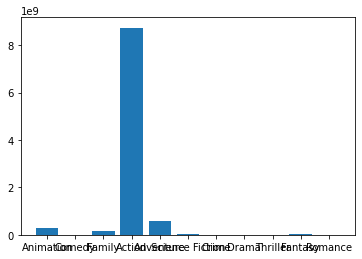

In [25]:
plt.bar(genrevalue.keys(), genrevalue.values())

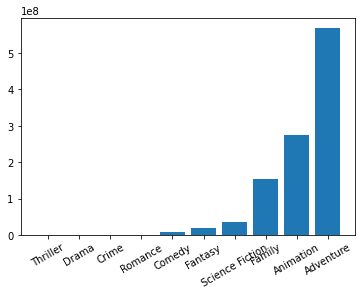

In [26]:
plt.xticks(rotation=30)
noaction = plt.bar(sortgenrenoaction.keys(), sortgenrenoaction.values())


In [27]:
noactionadventure = sortgenrenoaction
del noactionadventure['Adventure']

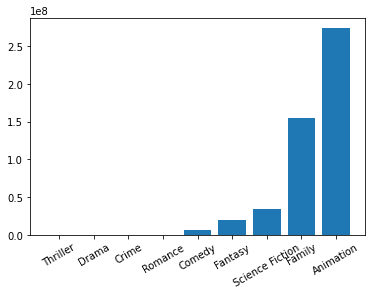

In [28]:
plt.xticks(rotation=30)
noactionadventureplot = plt.bar(noactionadventure.keys(), noactionadventure.values())

In [29]:
tnbudgets

,id,release_date,production_budget,domestic_gross,worldwide_gross,return
movie,,,,,,
Avatar,1,2009-12-18,425000000,760507625,"$2,776,345,279",1.789430
Pirates of the Caribbean: On Stranger Tides,2,2011-05-20,410600000,241063875,"$1,045,663,875",0.587101
Dark Phoenix,3,2019-06-07,350000000,42762350,"$149,762,350",0.122178
Avengers: Age of Ultron,4,2015-05-01,330600000,459005868,"$1,403,013,963",1.388403
Star Wars Ep. VIII: The Last Jedi,5,2017-12-15,317000000,620181382,"$1,316,721,747",1.956408
...,...,...,...,...,...,...
Red 11,78,2018-12-31,7000,0,$0,0.000000
Following,79,1999-04-02,6000,48482,"$240,495",8.080333
Return to the Land of Wonders,80,2005-07-13,5000,1338,"$1,338",0.267600


AttributeError: Can only use .str accessor with string values!

In [ ]:
# genreval = {}
# for row in genre.index:
#     genrecount = 0
#     for ge in genres:
#         if genre.loc[row, ge]:
#             if ge not in genreval:
#                 genreval[ge] = genre.loc[row, 'return']
#                 genrecount += 1
#             else:
#                 genreval[ge] += genre.loc[row, 'return']
#                 genrecount += 1
#         try:
#             genreval[ge] = int(genreval[ge]) / genrecount
#         except:
#             continue
# genreval

In [ ]:
# # tmdbmovies['genre_ids'] = tmdbmovies['genre_ids'].apply(lambda x: ast.literal_eval(x))
# # tmdbmovies['genre_ids'].isin([16]).sum()
# # top3 = [28, 12, 16]
# animatedmovies = tmdbmovies[tmdbmovies['genre_ids'].str.contains('16')]
# anlist = list(animatedmovies.title)
# genre21.columns


# topan = []
# for movie in anlist:
#     movie = movie.replace(' ', '_').replace(':', '').replace("'",'').replace('-','_').replace('!','').replace('.','').replace('&','').replace('?','').replace('(','').replace(')','').replace('#','').replace('__','_').replace('__','_')
#     topan.append(movie)

# critic_ratings = []
# audience_ratings = []
# mistake = []
# ansuccess = []
# for i in range(len(topan)):
#     url = 'http://www.rottentomatoes.com/m/{}'.format(topan[i])
#     html_page = requests.get(url)
#     soup = BeautifulSoup(html_page.content, 'html.parser')
#     try:
#         critic_ratings.append(soup.find('span', class_="mop-ratings-wrap__percentage").text.strip())
#         ansuccess.append(topan[i])
#     except:
#         mistake.append(topan[i])
#     try:
#         audience_ratings.append(soup.find('span', class_="mop-ratings-wrap__percentage").text.strip())
#     except:
#         mistake.append(topan[i])

In [ ]:
# mistake = list(set(mistake))
# critic_ratings
andf = pd.DataFrame(index=ansuccess, columns=['domgross', 'budget', 'return', 'profit', 'critics', 'audiences'])
andf

In [ ]:
moneytable = tmdbmovies.merge(mjgross, on='title', how='inner')
# moneytable['title'] = moneytable['title'].apply(lambda x: x.replace(' ', '_').replace(':', '').replace("'",'').replace('-','_').replace('!','').replace('.','').replace('&','').replace('?','').replace('(','').replace(')','').replace('#','').replace('__','_').replace('__','_'))
moneytable.set_index('title')
# moneytable.reindex(anlist).notnull().sum()


In [ ]:
mjgross[mjgross['title'] == 'Toy Story']

In [ ]:
tmdbmovies

In [ ]:
# tmdbmovies['hasTop3Genres'] = [True if all(elem in ast.literal_eval(g) for elem in top3) else False for g in tmdbmovies['genre_ids']]
# tmanimdb = tmdbmovies[tmdbmovies['hasTop3Genres']==True]

In [ ]:
# anim = list(tmanimdb['title'])

In [ ]:
# tnanim = tnbudgets.set_index('movie')
# tnanim = tnanim[~tnanim.index.duplicated()]
# tnanim = tnanim.reindex(anim)

In [ ]:
# tnanim.notnull().sum()

In [ ]:
sns.histplot(data = genrevalue)

In [ ]:
sns.regplot(data = genre21, x = 'budget', y = 'return')

In [ ]:
sns.regplot(data = genre21, x = 'budget', y = 'profit')

In [ ]:
sns.regplot(data = genre21, x = 'audiences', y = 'profit')

In [ ]:
tmdbmovies[tmdbmovies['original_title'].str.contains('Force Awakens')]

In [ ]:
imdbcrewtitle2['primary_title'][0]

In [ ]:
imdbprincname = imdbprinc.merge(imdbname, on='nconst')

In [ ]:
imdbprincnametitleouter = imdbprincname.merge(imdbtitle, left_on='tconst', right_on='title_id',how='outer')

In [ ]:
imdball = imdbprincnametitleouter.merge(imdbcrewtitle2, on='tconst')
imdball